PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pandas import read_csv

In [2]:
df1=pd.read_csv("AllFeb21-fraud.csv")
df2=pd.read_csv("AllFeb21-click.csv")
df2=df2.sample(frac=0.06)

In [3]:
df=pd.concat([df1,df2], sort = False, axis=0, join='outer')

In [4]:
df.head()

,id,timestamp,imprId,clmbUserId,adSltDimId,auds,itemid,algo,advClientId,pubClientId,...,cityDimId,stateDimId,ispDimId,userAgent,osDimId,devTypeDimId,vendorDimId,modelDimId,connTypeDimId,browserDimId
0,AWG0etPWgZyWSkOz8de0,2018-02-21T00:00:00.357+05:30,5d5cb350-a6ca-4a43-a7e5-d0d0e13001ad-10wzw,ec9b6986-6ec1-4d24-85ab-2343f8d3c553-10nns,298928,"9hx,7dx,592,596,ctf,cth,5ag,ctp,8gv,8gw,58k,9i...",19760035,18,7711,45681,...,437,1808,265618,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:10.0) ...,196058,196047,196151,204038,264494,129467
1,AWG0etPFY5M4951fKkat,2018-02-21T00:00:00.818+05:30,5d5cb350-a6ca-4a43-a7e5-d0d0e13001ad-10wzw,ec9b6986-6ec1-4d24-85ab-2343f8d3c553-10nns,298928,"9hx,7dx,592,596,ctf,cth,5ag,ctp,8gv,8gw,58k,9i...",19760035,18,7711,45681,...,437,1808,265618,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:10.0) ...,196058,196047,196151,204038,264494,129467
2,AWG0e0GGY5M4951fKwtx,2018-02-21T00:00:31.928+05:30,6f204377-e2ea-433a-a524-181c1a0566cd-10ni9,fa38f9fc-3243-4500-8a24-9da7914a24c8-10otg,252853,"7j8,9hx,7dy,41j,8ka,ai9,8sm,5o2,437,9ij,8sy,8s...",18213172,18,1091,26570,...,10235,1800,280429,Dalvik/2.1.0 (Linux; U; Android 5.1.1; vivo Y3...,129311,196041,196472,227522,264496,129433
3,AWG0e3iV2xuD_p56vXkM,2018-02-21T00:00:46.018+05:30,3fa8c2bb-e96b-4c28-88ca-39ab3a3d3f8f-3rk0,14735c5f-62d3-4460-98e0-15cea6639ff9-10tu0,259397,"aii,6hs,aim,ail,9hx,aix,8so,8sq,8s2,47z,5o2,43...",953021,18,11854,2658,...,0,0,188879,Mozilla/5.0 (Linux; Android 6.0; Infinix_X521 ...,129311,196041,196315,0,264494,129408
4,AWG0fBeQzP48jYdEVZn1,2018-02-21T00:01:26.562+05:30,e240612d-b758-45ef-90be-a8b81450d672-10onw,baf48549-06d3-4fa6-a764-0936e6ebff87-10uu5,298928,"7dn,ai9,596,359,5ag,8gp,9iu,8gw,58k,9ix,aj1,5a...",19433112,2,10179,45681,...,437,1808,265618,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,196058,196047,196460,202038,264494,129639


In [5]:
df = df.sample(frac=1).reset_index(drop=True) # shuffle the dataset
# print(df['fraud'])

In [6]:
#dropping unnecesary
df=df.drop('bundleId',axis=1)#NR
df=df.drop('refUrl',axis=1)#NR
df=df.drop('fraudReason',axis=1)#NR

df=df.drop('auds',axis=1)#COMPLEX
df=df.drop('callIdentifier',axis=1)#COMPLEX
df=df.drop('section',axis=1)#COMPLEX
df=df.drop('ctxCatId',axis=1)#COMPLEX
df=df.drop('clickXForwardedFor',axis=1)#COMPLEX

df=df.drop('crtd',axis=1)#CONST
df=df.drop('paid',axis=1)#CONST
df=df.drop('esi',axis=1)#CONST

In [7]:
# Encoding the Independent Variable - id
labelencoder_X = LabelEncoder()
df.id = labelencoder_X.fit_transform(df.id)

# Encoding the Independent Variable - timestamp
labelencoder_X = LabelEncoder()
df.timestamp = labelencoder_X.fit_transform(df.timestamp)

# Encoding the Independent Variable - imprId
labelencoder_X = LabelEncoder()
df.imprId = labelencoder_X.fit_transform(df.imprId)

# Encoding the Independent Variable - clmbUserId
labelencoder_X = LabelEncoder()
df.clmbUserId = labelencoder_X.fit_transform(df.clmbUserId)

# Encoding the Independent Variable - clickIp
labelencoder_X = LabelEncoder()
df.clickIp = labelencoder_X.fit_transform(df.clickIp)

# Encoding the Independent Variable - impressionServedTimeStamp
labelencoder_X = LabelEncoder()
df.impressionServedTimeStamp = labelencoder_X.fit_transform(df.impressionServedTimeStamp)

# Encoding the Independent Variable - ip
labelencoder_X = LabelEncoder()
df.ip = labelencoder_X.fit_transform(df.ip)

# Encoding the Independent Variable - userAgent
labelencoder_X = LabelEncoder()
df.userAgent = labelencoder_X.fit_transform(df.userAgent)

In [8]:
#Imputation

# mark zero values as missing or NaN
df =df.replace(0, np.NaN)
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)

In [9]:
# Encoding the Independent Variable - fraud #this is done after imputation else all these zeros will be replaced by 1s
labelencoder_X = LabelEncoder()
df.fraud= labelencoder_X.fit_transform(df.fraud)
# print(df['fraud'])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0, 100))


In [11]:
df.columns.values


array(['id', 'timestamp', 'imprId', 'clmbUserId', 'adSltDimId', 'itemid',
       'algo', 'advClientId', 'pubClientId', 'itmClmbLId', 'tmpltId',
       'clickBid', 'position', 'siteId', 'fraud', 'uuidSource', 'clickIp',
       'clickGeoId', 'adBlockerDetectionValueId',
       'impressionServedTimeStamp', 'ip', 'geoDimId', 'cityDimId',
       'stateDimId', 'ispDimId', 'userAgent', 'osDimId', 'devTypeDimId',
       'vendorDimId', 'modelDimId', 'connTypeDimId', 'browserDimId'],
      dtype=object)

In [12]:
cor = df.corr()
cor_sorted = cor.sort_values(by=['fraud'], ascending=False).iloc[:,14] #sorting the features to show high corelated features (with fraud) on the top
# cor_sorted

In [13]:
# position                     0.021268
# connTypeDimId                0.014521
# advClientId                  0.001073
# clickGeoId                  -0.001880
# clmbUserId                  -0.013623
# imprId                      -0.018225
# these can be removed

In [14]:
sp_cor = df.corr(method='spearman')
sp_cor_sorted = sp_cor.sort_values(by=['fraud'], ascending=False).iloc[:,14] #sorting the features to show high spearman corelated features (with fraud) on the top

In [15]:
array = df.values
x_cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
# store the feature matrix (X) and response vector (y)
X = array[:,x_cols]
Y = array[:,14]

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [16]:
#to print confusion matrix
from sklearn.metrics import confusion_matrix

#to print metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

GAUSSIAN NAIVEBAYES CLASSIFIER - without normalisation

In [17]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# making predictions on the testing set
Y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
# print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

#Confusion matrix and various metrics of GNB classifer

results = confusion_matrix(Y_test, Y_pred)
print ('Confusion Matrix of GNB Classifier:')
print(results)
print ('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print ('Report : ')
print (classification_report(Y_test, Y_pred))

Confusion Matrix of GNB Classifier:
[[1471  156]
 [ 659  773]]
Accuracy Score : 0.7335730630925139
Report : 
             precision    recall  f1-score   support

        0.0       0.69      0.90      0.78      1627
        1.0       0.83      0.54      0.65      1432

avg / total       0.76      0.73      0.72      3059



SVM - without normalisation

In [18]:
# from sklearn.svm import SVC # "Support Vector Classifier"
# clf = SVC(kernel='linear')

# # fitting x samples and y classes
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)

# # comparing actual response values (y_test) with predicted response values (y_pred)
# print("SVM accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

# results = confusion_matrix(Y_test, Y_pred)
# print ('Confusion Matrix SVM:')
# print(results)
# print ('Accuracy Score :',accuracy_score(Y_test, Y_pred))
# print ('Report : ')
# print (classification_report(Y_test, Y_pred))

LOGISTIC REGRESSION - without normalisation

In [19]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
# Put the result into a color plot

# print("Logistic Regression accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

results = confusion_matrix(Y_test, Y_pred)
print ('Confusion Matrix SVM:')
print(results)
print ('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print ('Report : ')
print (classification_report(Y_test, Y_pred))

Confusion Matrix SVM:
[[1451  176]
 [ 491  941]]
Accuracy Score : 0.7819548872180451
Report : 
             precision    recall  f1-score   support

        0.0       0.75      0.89      0.81      1627
        1.0       0.84      0.66      0.74      1432

avg / total       0.79      0.78      0.78      3059



Normalising data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0, 100))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

GNB CLASSIFIER - normalised input

In [22]:
# training the model on training set
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
gnb.fit(X_train, Y_train)
# making predictions on the testing set
Y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 79.53579601176855


In [23]:
#Confusion matrix and various metrics of GNB classifer

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

results = confusion_matrix(Y_test, Y_pred)
print ('Confusion Matrix of GNB Classifier:')
print(results)
print ('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print ('Report : ')
print (classification_report(Y_test, Y_pred))

Confusion Matrix of GNB Classifier:
[[1262  365]
 [ 261 1171]]
Accuracy Score : 0.7953579601176856
Report : 
             precision    recall  f1-score   support

        0.0       0.83      0.78      0.80      1627
        1.0       0.76      0.82      0.79      1432

avg / total       0.80      0.80      0.80      3059



SVM - normalised input

In [24]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
# print("SVM accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

results = confusion_matrix(Y_test, Y_pred)
print ('Confusion Matrix SVM:')
print(results)
print ('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print ('Report : ')
print (classification_report(Y_test, Y_pred))

Confusion Matrix SVM:
[[1626    1]
 [  39 1393]]
Accuracy Score : 0.986923831317424
Report : 
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1627
        1.0       1.00      0.97      0.99      1432

avg / total       0.99      0.99      0.99      3059



LOGISTIC REGRESSION - normalised input

In [25]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
# Put the result into a color plot

# print("Logistic Regression accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

results = confusion_matrix(Y_test, Y_pred)
print ('Confusion Matrix Logistic regression :')
print(results)
print ('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print ('Report : ')
print (classification_report(Y_test, Y_pred))

Confusion Matrix Logistic regression :
[[1620    7]
 [  37 1395]]
Accuracy Score : 0.9856162144491664
Report : 
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1627
        1.0       1.00      0.97      0.98      1432

avg / total       0.99      0.99      0.99      3059



DEEP LEARNING

In [26]:
import warnings
warnings.filterwarnings('ignore')
# from pandas import read_csv
# import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import BatchNormalization
import pylab as plt
import h5py

Using TensorFlow backend.


In [27]:
import sklearn.metrics

In [28]:

batch_size = 128
num_classes = 2
epochs = 30


In [29]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# Y_test

In [30]:
#building NN

In [31]:
first_layer_size = 31
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(31,)))
model.add(Dense(32, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='sigmoid'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 31)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1024      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                825       
_________________________________________________________________
batch_normalization_2 (Batch (None, 25)                100       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
__________

In [32]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
classifier = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=0,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04661931366994295
Test accuracy: 0.9879045439686172


In [33]:
#print(x_test[1:2].shape)
predictions = model.predict(X_test)
# prediction = prediction[0]
print('Prediction\n',predictions)
thr_pred =(predictions>0.5)*1
print('Thresholded output\n',thr_pred)

Prediction
 [[0.99623126 0.00376873]
 [0.996387   0.00361296]
 [0.00180777 0.99819225]
 ...
 [0.00190076 0.99809927]
 [0.00180778 0.99819225]
 [0.99640816 0.00359182]]
Thresholded output
 [[1 0]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# results = confusion_matrix(Y_test, l)
results = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))
print ('Confusion Matrix of Neural network:')
print(results)
print ('Accuracy Score :',accuracy_score(Y_test.argmax(axis=1), predictions.argmax(axis=1)))
print ('Report : ')
print (classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)))

Confusion Matrix of Neural network:
[[1611   16]
 [  21 1411]]
Accuracy Score : 0.9879045439686172
Report : 
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1627
          1       0.99      0.99      0.99      1432

avg / total       0.99      0.99      0.99      3059



In [35]:
model.save_weights('model.h5')

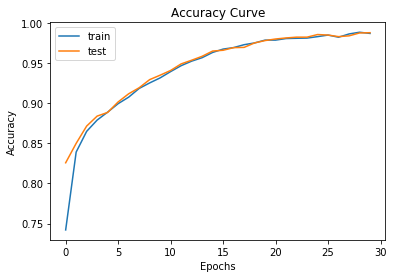

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.gcf()
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'], loc="upper left")
plt.show()
fig.savefig("Model_Accuracy_Curves.png")

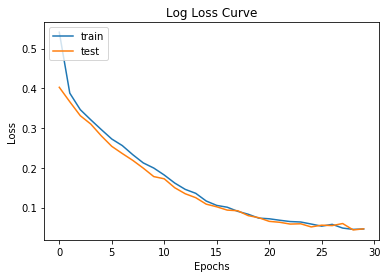

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.gcf()
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title("Log Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'], loc="upper left")
plt.show()
fig.savefig("Model_Loss_Curves.png")